## Job Listing

# DATA PRE-PROCESSING

#### Loading the csv file and Libraries

In [28]:
#load Libraries for pre-processing
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
import pandas as pd
import numpy as np

In [10]:
#load the csv file
df1 = pd.read_csv("computerengineer.csv")

In [11]:
df1.head()

,Title,Company,Location,Salary,Sponsored,Summary
0,Desktop Support Engineer,Sree Bharath Computers,"Luz Church Road, Tamil Nadu","₹12,000 - ₹16,000 a month",In-Office,Desktop Support Engineer with Two wheeler and ...
1,Jr Systems Engineer,AnywhereWorks,"Chennai, Tamil Nadu",NaN,In-Office,FULL CREATIVE MISSION\nFULL Creative’s mission...
2,Computer Hardware & Networking Engineer,People point,"Chennai, Tamil Nadu","₹20,000 - ₹25,000 a month",In-Office,Net working Executives\n*Chennai & Mumbai *\nM...
3,Associate Software Engineer,Caterpillar,"Chennai, Tamil Nadu",NaN,In-Office,Description\nCareer Area:\nDigital\nJob Descri...
4,Engineer,Hubbell Incorporated,"Chennai, Tamil Nadu",NaN,In-Office,Brand Overview\n\nHubbell Incorporated was fou...


#### Check Data Type of variables 

In [12]:
display(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Title      135 non-null    object
 1   Company    135 non-null    object
 2   Location   135 non-null    object
 3   Salary     53 non-null     object
 4   Sponsored  135 non-null    object
 5   Summary    135 non-null    object
dtypes: object(6)
memory usage: 6.5+ KB


None

#### Summarize data

In [13]:
#Display a description of the dataset
display(df1.describe())

,Title,Company,Location,Salary,Sponsored,Summary
count,135,135,135,53,135,135
unique,86,82,5,23,2,107
top,Software Engineer,Standard Chartered,"Chennai, Tamil Nadu","₹12,000 - ₹16,000 a month",In-Office,Bachelor’s degree in computer science (or rela...
freq,7,7,128,9,124,3


In [14]:
df1['Title'].value_counts()

Software Engineer                              7
Senior Software Engineer                       6
IT Support Engineer                            4
Data Engineer                                  4
Technical Support Engineer                     3
                                              ..
Support Engineer                               1
Engineer - Software Development                1
Desktop / Laptop support - Field engineer      1
L1 Technical Support Engineering Internship    1
System Engineer – Managed Services             1
Name: Title, Length: 86, dtype: int64

In [15]:
df1['Company'].value_counts()

Standard Chartered        7
Class One Exchange        6
Valeo                     5
Sree Bharath Computers    4
Denodo Technologies       3
                         ..
Bank of America           1
AnywhereWorks             1
Linedata Services         1
Computer Engineer         1
Rage Communications       1
Name: Company, Length: 82, dtype: int64

#### Structurize Data

In [16]:
# Removing Special Characters
Spec_char=[',','₹','a month']
for char in Spec_char:
    df1['Salary'] = df1['Salary'].str.replace(char,'')
df1['Salary']

0      12000 - 16000 
1                 NaN
2      20000 - 25000 
3                 NaN
4                 NaN
            ...      
130               NaN
131            45000 
132    18000 - 25000 
133               NaN
134            45000 
Name: Salary, Length: 135, dtype: object

In [17]:
# We take minimum salary range and slice them.
dftemp = pd.DataFrame(columns=["index"])
dftemp["index"]=df1['Salary'].str.find(" ",0)
dftemp

,index
0,5.0
1,NaN
2,5.0
3,NaN
4,NaN
...,...
130,NaN
131,5.0
132,5.0
133,NaN


In [18]:
dftemp.max()

index    5.0
dtype: float64

The maximum lenght of salary is "5". So, We slice with length of 5.

In [19]:
df1['Salary'] = df1.Salary.str.slice(0,5) 
df1

,Title,Company,Location,Salary,Sponsored,Summary
0,Desktop Support Engineer,Sree Bharath Computers,"Luz Church Road, Tamil Nadu",12000,In-Office,Desktop Support Engineer with Two wheeler and ...
1,Jr Systems Engineer,AnywhereWorks,"Chennai, Tamil Nadu",NaN,In-Office,FULL CREATIVE MISSION\nFULL Creative’s mission...
2,Computer Hardware & Networking Engineer,People point,"Chennai, Tamil Nadu",20000,In-Office,Net working Executives\n*Chennai & Mumbai *\nM...
3,Associate Software Engineer,Caterpillar,"Chennai, Tamil Nadu",NaN,In-Office,Description\nCareer Area:\nDigital\nJob Descri...
4,Engineer,Hubbell Incorporated,"Chennai, Tamil Nadu",NaN,In-Office,Brand Overview\n\nHubbell Incorporated was fou...
...,...,...,...,...,...,...
130,"Mgr, QA & Testing",Standard Chartered,"Chennai, Tamil Nadu",NaN,In-Office,Job: Technology\nPrimary Location: ASEAN & Sou...
131,Information Technology Support Engineer,Infochola Solutions India Pvt Ltd,"Chennai, Tamil Nadu",45000,Remote,"Job Description\nResponsible for deployment, t..."
132,Software Support Engineer For Freshers,Associate Software Engineer,"Chennai, Tamil Nadu",18000,In-Office,Job Summary\nPublished on : 2 days ago\nVacanc...
133,Embedded Developer,TrackerWave,"Chennai, Tamil Nadu",NaN,In-Office,1 To 8 Years\nWe are looking for an embedded s...


#### Checking missing values

<AxesSubplot:>

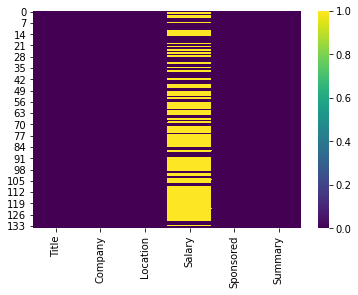

In [20]:
sns.heatmap(df1.isnull(), cmap='viridis')

Salary column has the maximum amount of null values.

#### Changing Data Type

In [21]:
#converting from object data type to numeric
df1["Salary"] = pd.to_numeric(df1["Salary"])
df1["Sponsored"] = pd.Categorical(df1["Sponsored"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Title      135 non-null    object  
 1   Company    135 non-null    object  
 2   Location   135 non-null    object  
 3   Salary     53 non-null     float64 
 4   Sponsored  135 non-null    category
 5   Summary    135 non-null    object  
dtypes: category(1), float64(1), object(4)
memory usage: 5.7+ KB


#### Checking outliers

<AxesSubplot:xlabel='Salary'>

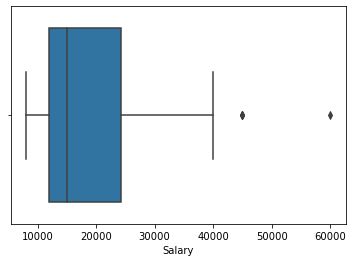

In [22]:
sns.boxplot(x=df1['Salary'])

So, There is a prescence of outlier.

In [23]:
# I manually find the outlier as there are only few of them
i = df1[((df1.Salary == 60000))].index
i

Int64Index([61], dtype='int64')

In [24]:
# Remove that particular row
df1 = df1.drop(i)

#### Handling Missing Values

In [26]:
df1['Salary'].isnull().sum()

82

In [29]:
# I Replace the Null values with mean value. 
salary = math.trunc(df1['Salary'].mean())
df1['Salary']=df1['Salary'].replace(np.NaN ,salary)
df1

,Title,Company,Location,Salary,Sponsored,Summary
0,Desktop Support Engineer,Sree Bharath Computers,"Luz Church Road, Tamil Nadu",12000.0,In-Office,Desktop Support Engineer with Two wheeler and ...
1,Jr Systems Engineer,AnywhereWorks,"Chennai, Tamil Nadu",18992.0,In-Office,FULL CREATIVE MISSION\nFULL Creative’s mission...
2,Computer Hardware & Networking Engineer,People point,"Chennai, Tamil Nadu",20000.0,In-Office,Net working Executives\n*Chennai & Mumbai *\nM...
3,Associate Software Engineer,Caterpillar,"Chennai, Tamil Nadu",18992.0,In-Office,Description\nCareer Area:\nDigital\nJob Descri...
4,Engineer,Hubbell Incorporated,"Chennai, Tamil Nadu",18992.0,In-Office,Brand Overview\n\nHubbell Incorporated was fou...
...,...,...,...,...,...,...
130,"Mgr, QA & Testing",Standard Chartered,"Chennai, Tamil Nadu",18992.0,In-Office,Job: Technology\nPrimary Location: ASEAN & Sou...
131,Information Technology Support Engineer,Infochola Solutions India Pvt Ltd,"Chennai, Tamil Nadu",45000.0,Remote,"Job Description\nResponsible for deployment, t..."
132,Software Support Engineer For Freshers,Associate Software Engineer,"Chennai, Tamil Nadu",18000.0,In-Office,Job Summary\nPublished on : 2 days ago\nVacanc...
133,Embedded Developer,TrackerWave,"Chennai, Tamil Nadu",18992.0,In-Office,1 To 8 Years\nWe are looking for an embedded s...


#### Creating a New Variable

In [30]:
#new variable
df1['Daily wage'] = df1.apply(lambda row: row.Salary/30, axis = 1) 
df1["Daily wage"].head()

0    400.000000
1    633.066667
2    666.666667
3    633.066667
4    633.066667
Name: Daily wage, dtype: float64

#### Label Encoding

In [31]:
number = LabelEncoder()
df1["Title"] = number.fit_transform(df1["Title"].astype('str'))
df1.tail(5)

,Title,Company,Location,Salary,Sponsored,Summary,Daily wage
130,46,Standard Chartered,"Chennai, Tamil Nadu",18992.0,In-Office,Job: Technology\nPrimary Location: ASEAN & Sou...,633.066667
131,40,Infochola Solutions India Pvt Ltd,"Chennai, Tamil Nadu",45000.0,Remote,"Job Description\nResponsible for deployment, t...",1500.000000
132,68,Associate Software Engineer,"Chennai, Tamil Nadu",18000.0,In-Office,Job Summary\nPublished on : 2 days ago\nVacanc...,600.000000
133,27,TrackerWave,"Chennai, Tamil Nadu",18992.0,In-Office,1 To 8 Years\nWe are looking for an embedded s...,633.066667
134,75,CONTOUR DATA SOLUTIONS (Haact Dc Solutions Ind...,"Chennai, Tamil Nadu",45000.0,Remote,Bachelor’s degree in computer science (or rela...,1500.000000


In [32]:
# Label Encoding
number = LabelEncoder()
df1["Sponsored"] = number.fit_transform(df1["Sponsored"].astype('str'))
df1.tail(5)

,Title,Company,Location,Salary,Sponsored,Summary,Daily wage
130,46,Standard Chartered,"Chennai, Tamil Nadu",18992.0,0,Job: Technology\nPrimary Location: ASEAN & Sou...,633.066667
131,40,Infochola Solutions India Pvt Ltd,"Chennai, Tamil Nadu",45000.0,1,"Job Description\nResponsible for deployment, t...",1500.000000
132,68,Associate Software Engineer,"Chennai, Tamil Nadu",18000.0,0,Job Summary\nPublished on : 2 days ago\nVacanc...,600.000000
133,27,TrackerWave,"Chennai, Tamil Nadu",18992.0,0,1 To 8 Years\nWe are looking for an embedded s...,633.066667
134,75,CONTOUR DATA SOLUTIONS (Haact Dc Solutions Ind...,"Chennai, Tamil Nadu",45000.0,1,Bachelor’s degree in computer science (or rela...,1500.000000


In [33]:
number = LabelEncoder()
df1["Location"] = number.fit_transform(df1["Location"].astype('str'))
df1.tail(5)


,Title,Company,Location,Salary,Sponsored,Summary,Daily wage
130,46,Standard Chartered,1,18992.0,0,Job: Technology\nPrimary Location: ASEAN & Sou...,633.066667
131,40,Infochola Solutions India Pvt Ltd,1,45000.0,1,"Job Description\nResponsible for deployment, t...",1500.000000
132,68,Associate Software Engineer,1,18000.0,0,Job Summary\nPublished on : 2 days ago\nVacanc...,600.000000
133,27,TrackerWave,1,18992.0,0,1 To 8 Years\nWe are looking for an embedded s...,633.066667
134,75,CONTOUR DATA SOLUTIONS (Haact Dc Solutions Ind...,1,45000.0,1,Bachelor’s degree in computer science (or rela...,1500.000000


In [34]:
number = LabelEncoder()
df1["Company"] = number.fit_transform(df1["Company"].astype('str'))
df1.tail(5)

,Title,Company,Location,Salary,Sponsored,Summary,Daily wage
130,46,68,1,18992.0,0,Job: Technology\nPrimary Location: ASEAN & Sou...,633.066667
131,40,41,1,45000.0,1,"Job Description\nResponsible for deployment, t...",1500.000000
132,68,6,1,18000.0,0,Job Summary\nPublished on : 2 days ago\nVacanc...,600.000000
133,27,70,1,18992.0,0,1 To 8 Years\nWe are looking for an embedded s...,633.066667
134,75,14,1,45000.0,1,Bachelor’s degree in computer science (or rela...,1500.000000


In [38]:
df1.drop("Summary",axis=1)

,Title,Company,Location,Salary,Sponsored,Daily wage
0,20,67,2,12000.0,0,400.000000
1,43,5,1,18992.0,0,633.066667
2,14,56,1,20000.0,0,666.666667
3,6,18,1,18992.0,0,633.066667
4,29,40,1,18992.0,0,633.066667
...,...,...,...,...,...,...
130,46,68,1,18992.0,0,633.066667
131,40,41,1,45000.0,1,1500.000000
132,68,6,1,18000.0,0,600.000000
133,27,70,1,18992.0,0,633.066667


In [39]:
df1.to_csv("computerengineer_preprocessed.csv",index=False)

In [41]:
processed = pd.read_csv("computerengineer_preprocessed.csv")
processed

,Title,Company,Location,Salary,Sponsored,Daily wage
0,20,67,2,12000.0,0,400.000000
1,43,5,1,18992.0,0,633.066667
2,14,56,1,20000.0,0,666.666667
3,6,18,1,18992.0,0,633.066667
4,29,40,1,18992.0,0,633.066667
...,...,...,...,...,...,...
129,46,68,1,18992.0,0,633.066667
130,40,41,1,45000.0,1,1500.000000
131,68,6,1,18000.0,0,600.000000
132,27,70,1,18992.0,0,633.066667
